# **K-Drama Recommendation System using Content-Based Filtering**

---

oleh : Anju Anjannah

# **Deskripsi Proyek**

Proyek ini bertujuan untuk mengembangkan sistem rekomendasi berbasis konten yang dapat membantu pengguna menemukan K-Drama baru yang sesuai dengan selera mereka. Dengan semakin banyaknya pilihan K-Drama, proses pencarian yang manual bisa menjadi sulit dan memakan waktu. Sistem ini akan menganalisis fitur konten utama **genre** untuk merekomendasikan K-Drama yang memiliki kesamaan genre dengan K-Drama yang disukai pengguna. Hal ini akan memudahkan pengguna untuk menemukan konten yang relevan dan meningkatkan pengalaman menonton mereka.

# **1. Data Understanding**

Dataset : https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset/

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahbab911/top-250-korean-dramas-kdrama-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/top-250-korean-dramas-kdrama-dataset


In [3]:
csv_file_path = os.path.join(path, "kdrama.csv")

df = pd.read_csv(csv_file_path)
df.to_csv("kdrama.csv", index=False)

In [4]:
df.head(3)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3


Informasi mengenai kolom dataframe:

- **Name**: Nama atau judul K-Drama.
- **Aired Date**: Tanggal penayangan perdana K-Drama.
- **Year of release**: Tahun rilis K-Drama.
- **Original Network**: Jaringan televisi asli yang menayangkan K-Drama.
- **Aired On**: Hari atau waktu penayangan K-Drama.
- **Number of Episodes**: Jumlah total episode dalam K-Drama.
- **Duration**: Durasi per episode K-Drama.
- **Content Rating**: Klasifikasi rating konten (misalnya, Semua Umur, 13+, 18+).
- **Rating**: Rating rata-rata K-Drama oleh pengguna atau kritikus.
- **Synopsis**: Ringkasan cerita atau alur K-Drama.
- **Genre**: Kategori genre K-Drama (misalnya, Romance, Comedy, Thriller).
- **Tags**: Kata kunci atau label yang terkait dengan K-Drama, seringkali menggambarkan tema atau mood.
- **Director**: Nama sutradara K-Drama.
- **Screenwriter**: Nama penulis naskah K-Drama.
- **Cast**: Daftar nama pemeran utama atau penting dalam K-Drama.
- **Production companies**: Nama perusahaan produksi yang terlibat dalam pembuatan K-Drama.
- **Rank**: Peringkat K-Drama dalam daftar tertentu (misalnya, top 250).


## a. EDA : Descriptive Statistics

In [5]:
df.shape

(250, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

In [7]:
df.isna().sum()

,0
Name,0
Aired Date,0
Year of release,0
Original Network,0
Aired On,0
Number of Episodes,0
Duration,0
Content Rating,5
Rating,0
Synopsis,0


In [8]:
df[df.duplicated()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank


In [9]:
df.describe()

,Year of release,Number of Episodes,Rating
count,250.00000,250.000000,250.000000
mean,2018.25600,19.064000,8.534000
std,3.26452,13.245743,0.221359
min,2003.00000,1.000000,8.300000
25%,2017.00000,16.000000,8.300000
50%,2019.00000,16.000000,8.500000
75%,2021.00000,20.000000,8.700000
max,2022.00000,133.000000,9.200000


In [10]:
#melihat statistik deskriptif untuk kolom dengan tipe data object
df.describe(include='object')

,Name,Aired Date,Original Network,Aired On,Duration,Content Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
count,250,250,250,250,250,245,250,250,250,249,249,250,248,250
unique,250,248,45,21,38,4,250,205,250,184,182,249,171,250
top,Move to Heaven,"May 22, 2017 - Jul 11, 2017",tvN,"Wednesday, Thursday",1 hr. 10 min.,15+ - Teens 15 or older,Geu Roo is a young autistic man. He works for ...,"Psychological, Comedy, Romance, Drama","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Won Suk,Kim Eun Hee,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",Chorokbaem Media,#1
freq,1,2,49,40,56,216,1,4,1,5,6,2,7,1


Beberapa informasi yang dapat diperoleh dari tahapan **EDA : Descriptive Statistics** di atas adalah:

*   Dataset ini terdiri atas **250 baris dan 17 kolom**. Terdapat 3 kolom dengan tipe data numerik (`Number of Episodes`, `Rating`, `Rank`) dan 14 kolom dengan tipe data objek.
*   Terdapat missing value pada dataset, khususnya pada kolom `Content Rating`, `Director`, `Screenwriter`, dan `Production companies`. Missing value tersebut akan ditangani pada tahap Data Preparation.
*   Tidak terdapat data yang duplikat pada dataset.
*   Beberapa kolom yang memiliki multiple value atau daftar nilai dalam satu entri, seperti kolom `Original Network`, `Aired On`, `Genre`, dan `Tags`

## b. EDA : Univariate Analysis

**Data Numerik**

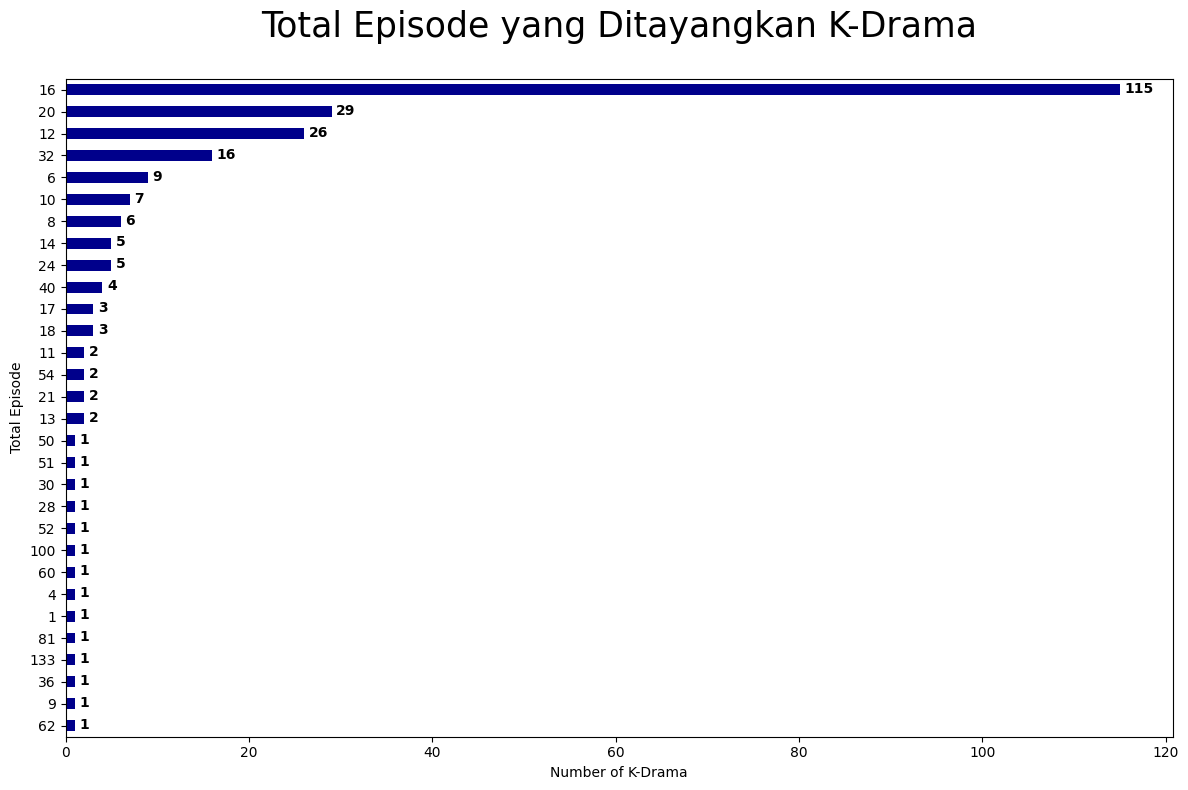

In [11]:
#banyaknya total episode yang digunakan K-Drama
count_each_episode = df['Number of Episodes'].value_counts().sort_values()
#visualisasi count_each_episode
count_each_episode.plot(kind='barh', figsize=(12,8), color='darkblue')
plt.grid(False)
plt.title('Total Episode yang Ditayangkan K-Drama', pad=30, fontsize=25)
plt.xlabel('Number of K-Drama')
plt.ylabel('Total Episode')
for i, v in enumerate(count_each_episode):
    plt.text(v+0.5, i-0.15, str(v), fontweight='bold')
plt.tight_layout()
plt.savefig('num_1.png')
plt.show()

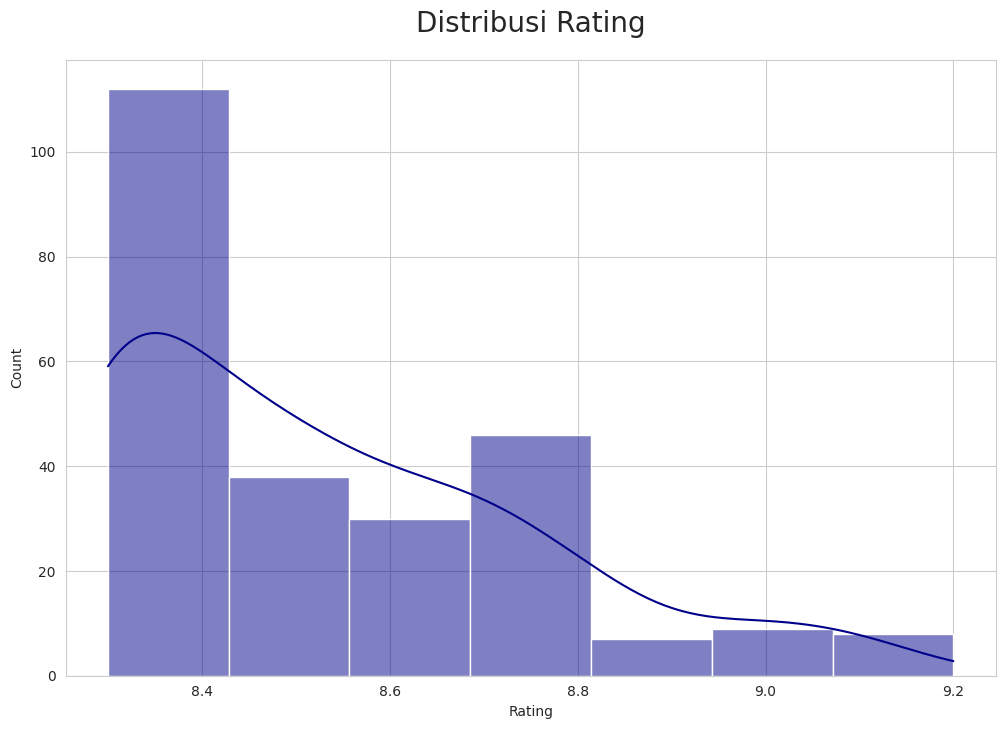

In [12]:
#membuat histogram untuk melihat distribusi data pada kolom 'Rating'
sns.set_style('whitegrid')
sns.histplot(data=df, x='Rating', kde=True, bins=7, color='darkblue')
plt.gcf().set_size_inches(12,8)
plt.title('Distribusi Rating', pad=20, fontsize=20)
plt.savefig('num_2.png')
plt.show()

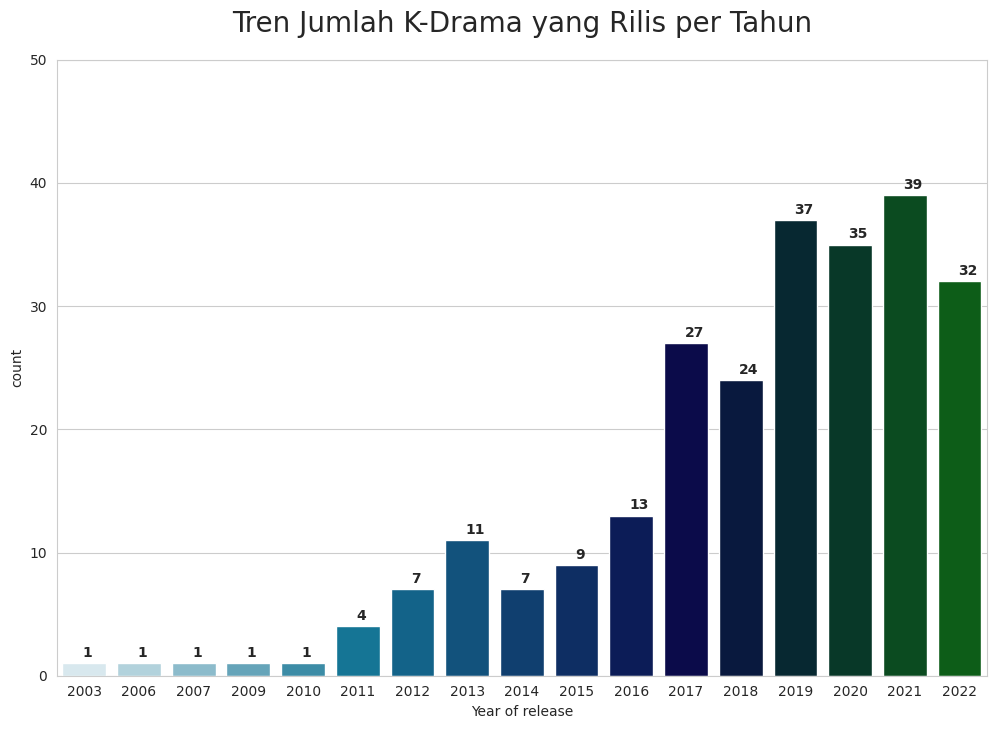

In [13]:
#banyaknya K-Drama yang rilis di setiap tahun
count = df['Year of release'].value_counts().sort_index()
#membuat count plot untuk kolom 'Year of release'
sns.set_style('whitegrid')
sns.countplot(x='Year of release', data=df, palette='ocean_r')
for i, v in enumerate(count):
    plt.text(i-0.03, v+0.5, str(v), fontweight='bold')
plt.ylim(ymax=50)
plt.title('Tren Jumlah K-Drama yang Rilis per Tahun', pad=20, fontsize=20)
plt.gcf().set_size_inches(12,8)
plt.savefig('num_3.png')
plt.show()

**Data Kategorikal**

Total Genre unik:  29
5 Genre yang Paling Sering Diadopsi:
           Count
Romance     136
Drama       129
Mystery      90
Comedy       88
Thriller     86


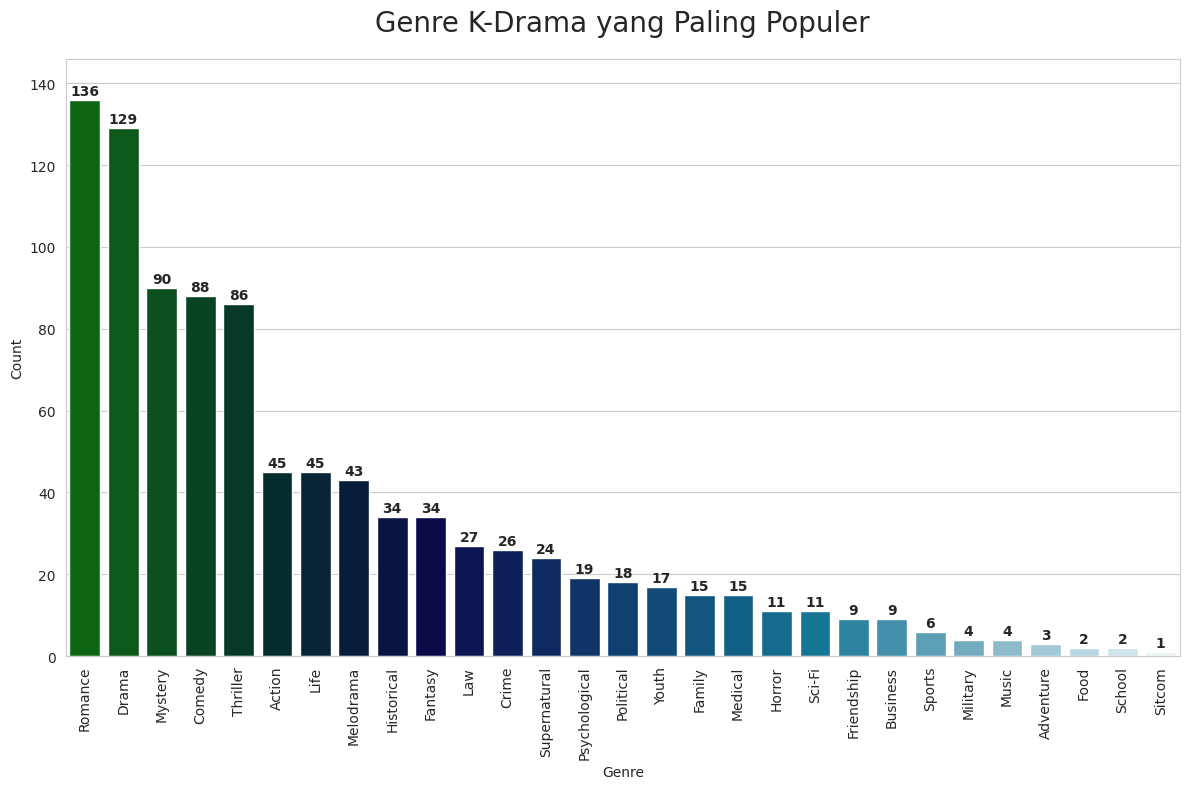

In [14]:
#menampung semua data genre yang muncul ke dalam list
genre_list = []
for genre in df['Genre'].to_list():
    # Memastikan setiap entri adalah string sebelum split
    if isinstance(genre, str):
        # Menggunakan split dengan ", " untuk menangani pemisahan
        genres = genre.strip().split(", ") # Mengubah pemisah menjadi ", " dan membersihkan spasi
        for gen in genres:
            genre_list.append(gen.strip()) # Menghapus spasi di awal/akhir
    else:
        # Handle kasus jika data bukan string
        pass

#membuat dataframe yang berisi banyak setiap genre
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient='index').rename(columns={0:'Count'})
genre_df.sort_values(by='Count', ascending = False, inplace = True)
print('Total Genre unik: ', len(genre_df))
print('5 Genre yang Paling Sering Diadopsi:\n', genre_df.head())

#membuat barplot untuk melihat banyak setiap genre
sns.set_style('whitegrid')
ax = sns.barplot(x=genre_df.index, y=genre_df['Count'], palette='ocean') # Menggunakan ax untuk akses patches

# Menambahkan label jumlah di atas masing-masing batang
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., count + 0.5), # Menyesuaikan posisi label
                ha='center', va='bottom',
                fontweight='bold')

plt.ylim(ymax=genre_df['Count'].max() + 10) # Menyesuaikan batas y max
plt.title('Genre K-Drama yang Paling Populer', pad=20, fontsize=20)
plt.xticks(rotation=90, ha='center') # Memutar label x 90 derajat
plt.xlabel('Genre') # Menambahkan label sumbu x
plt.ylabel('Count') # Menambahkan label sumbu y
plt.gcf().set_size_inches(12,8)
plt.tight_layout() # Menyesuaikan layout
plt.savefig('kat_1.png')
plt.show()

10 Network dengan kemunculan terbanyak:
        tvN  Netflix  SBS  MBC  KBS2  jTBC  OCN  Viki  ViuTV  iQiyi
Count   77       56   37   32    29    25   21     6      5      4


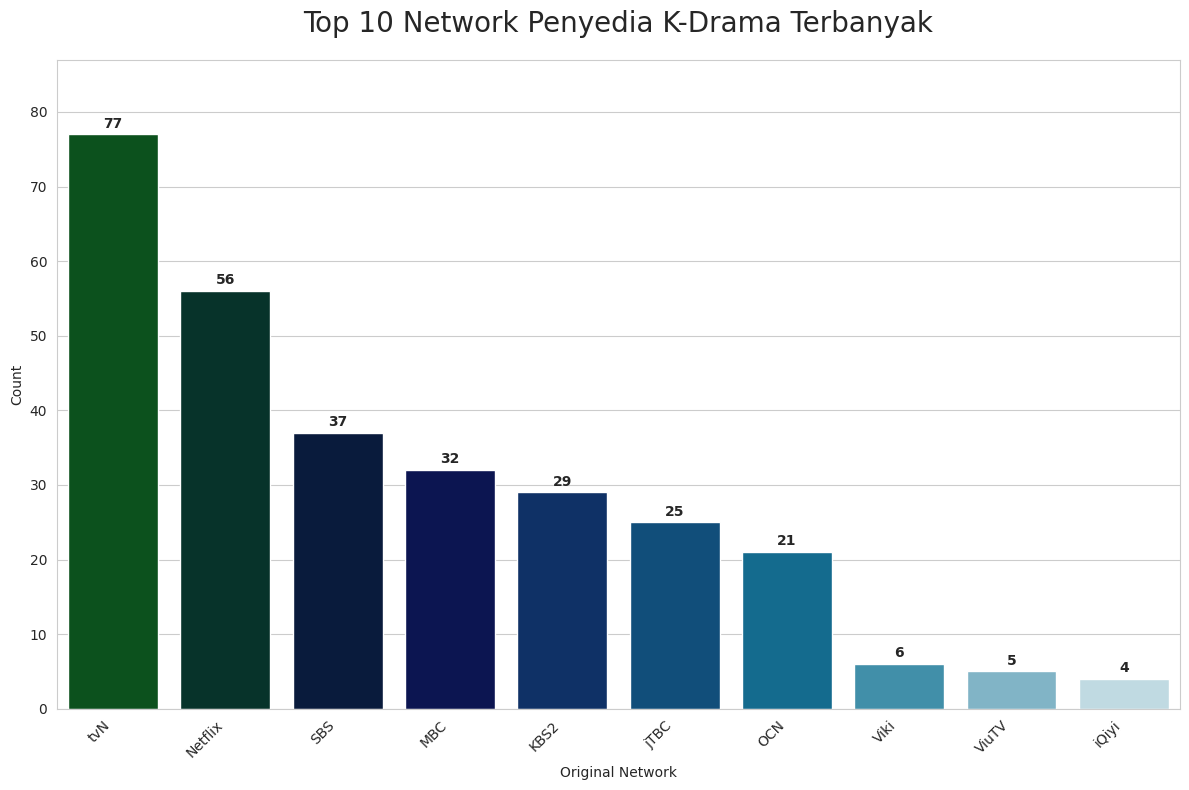

In [15]:
#menampung semua data network yang muncul ke dalam list
network_list = []
for networks in df['Original Network'].to_list():
    # Memastikan setiap entri adalah string sebelum split
    if isinstance(networks, str):
        # Menggunakan split dengan ", " untuk menangani pemisahan
        nets = networks.strip().split(", ")
        for network in nets:
            network_list.append(network.strip()) # Menghapus spasi di awal/akhir
    else:
        # Handle kasus jika data bukan string, misalnya NaN
        pass # atau log warning jika diperlukan

#membuat dataframe yang berisi banyak setiap network
network_df = pd.DataFrame.from_dict(Counter(network_list), orient='index').rename(columns={0:'Count'})
network_df.sort_values(by='Count', ascending = False, inplace = True)

# Mengambil top 10 network
top_networks_df = network_df.head(10)
print('10 Network dengan kemunculan terbanyak:\n', top_networks_df.T) # Mencetak transpose agar lebih rapi

#membuat barplot untuk melihat banyak 10 network teratas
sns.set_style('whitegrid')
# Menggunakan top_networks_df untuk visualisasi
ax = sns.barplot(x=top_networks_df.index, y=top_networks_df['Count'], palette='ocean')

# Menambahkan label jumlah di atas masing-masing batang
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., count + 0.5), # Menyesuaikan posisi label
                ha='center', va='bottom',
                fontweight='bold')

plt.ylim(ymax=top_networks_df['Count'].max() + 10) # Menyesuaikan batas y max
plt.title('Top 10 Network Penyedia K-Drama Terbanyak', pad=20, fontsize=20)
plt.xticks(rotation=45, ha='right') # Memutar label x agar tidak tumpang tindih
plt.xlabel('Original Network')
plt.ylabel('Count')
plt.gcf().set_size_inches(12,8)
plt.tight_layout() # Menyesuaikan layout agar tidak ada yang terpotong
plt.savefig('kat_2.png')
plt.show()

10 Tag dengan kemunculan tebanyak:
                     Count
Strong Female Lead     98
Smart Female Lead      49
Smart Male Lead        46
Nice Male Lead         45
Bromance               44
Murder                 42
Investigation          40
Death                  39
Revenge                33
Strong Male Lead       30


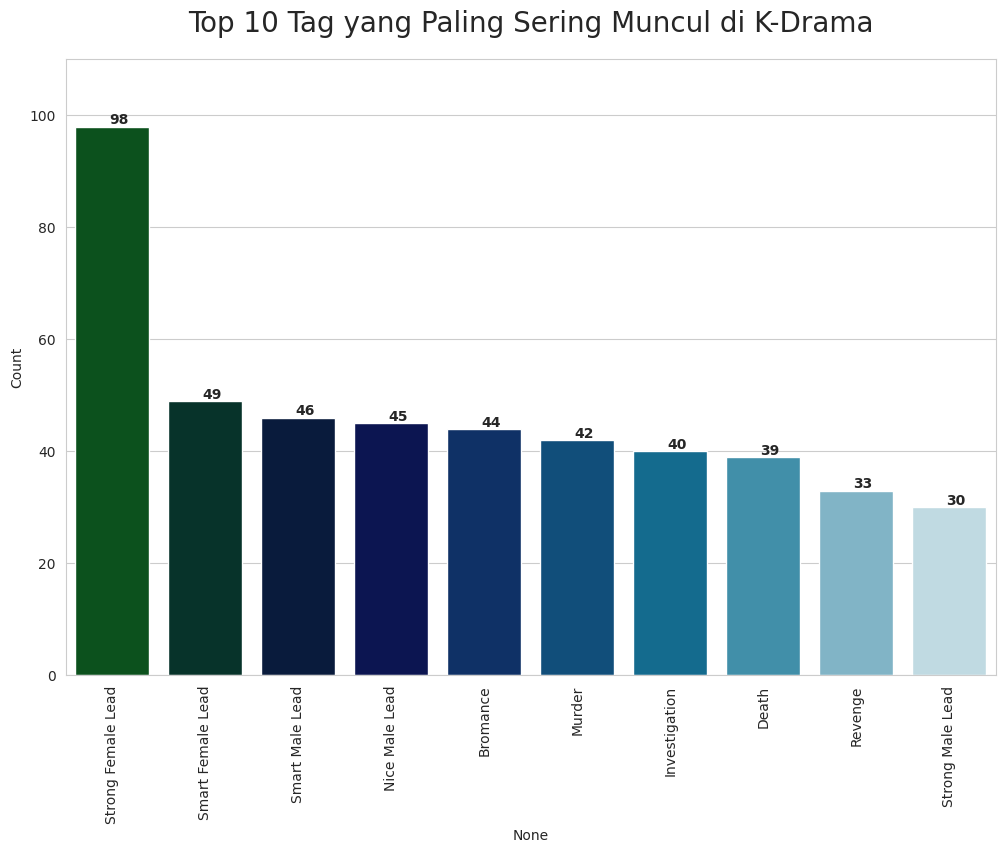

In [16]:
#menampung semua data tags yang muncul ke dalam list
tags_list = []
for tags in df['Tags'].to_list():
    tags = tags.strip().split(", ")
    for tag in tags:
        tags_list.append(tag)
#membuat dataframe yang berisi banyak setiap tag
tags_df = pd.DataFrame.from_dict(Counter(tags_list), orient='index').rename(columns={0:'Count'})
tags_df.sort_values(by='Count', ascending = False, inplace = True)
top_tags_df = tags_df.head(10)
print('10 Tag dengan kemunculan tebanyak:\n',top_tags_df)

#membuat barplot untuk melihat 10 tag dengan kemunculan terbanyak
sns.set_style('whitegrid')
sns.barplot(x=top_tags_df.index, y=top_tags_df['Count'], palette='ocean')
for i, v in enumerate(top_tags_df['Count']):
    plt.text(i-0.03, v+0.5, str(v), fontweight='bold')
plt.ylim(ymax=110)
plt.title('Top 10 Tag yang Paling Sering Muncul di K-Drama', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,8)
# Remove the unsupported 'quality' argument for PNG files
plt.savefig('kat_2.png')
plt.show()

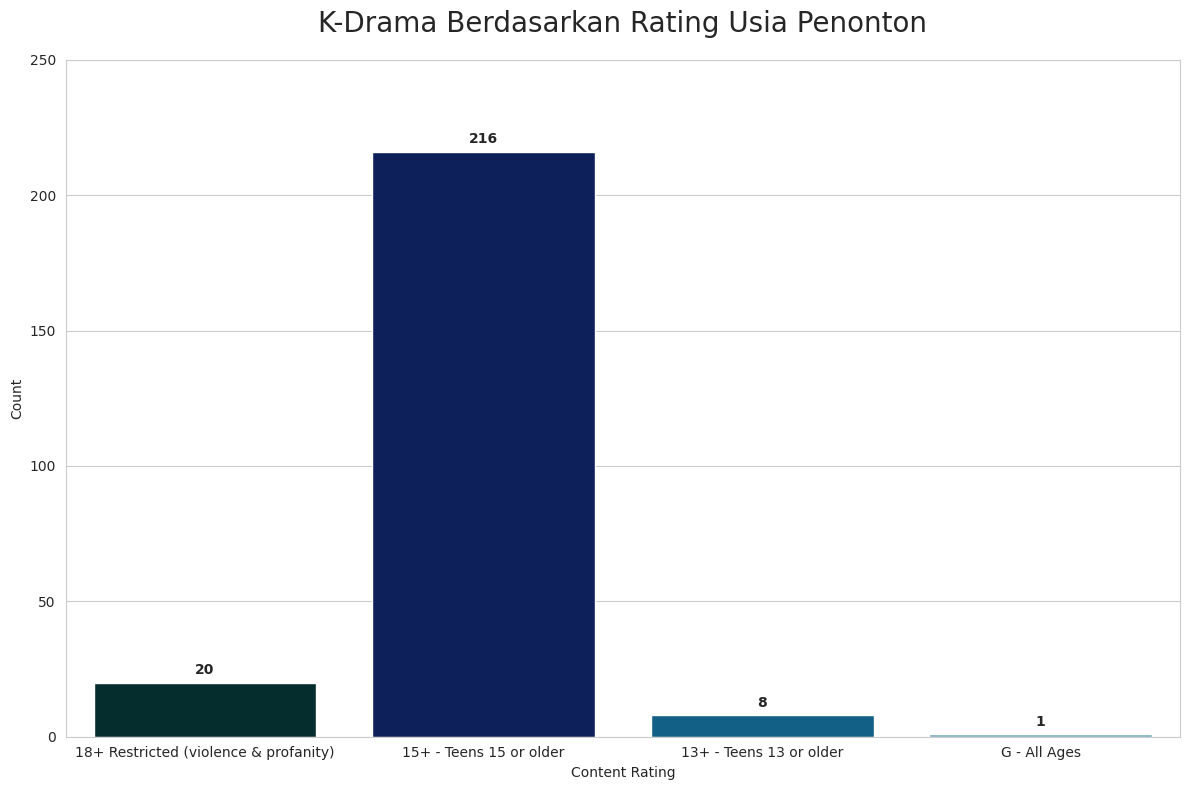

In [17]:
# Set style
sns.set_style('whitegrid')

# Buat plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Content Rating', data=df, palette='ocean')

# Tambahkan label jumlah di atas masing-masing batang
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., count + 2),
                ha='center', va='bottom',
                fontweight='bold')

# Tambahkan judul dan batas sumbu y
plt.title('K-Drama Berdasarkan Rating Usia Penonton', pad=20, fontsize=20)
plt.ylim(0, 250)  # Sedikit lebih tinggi dari max untuk ruang label
plt.xlabel('Content Rating')
plt.ylabel('Count')

# Simpan dan tampilkan
plt.tight_layout()
plt.savefig('kat_4.png')
plt.show()

Beberapa informasi yang dapat diperoleh dari tahapan **EDA : Univariate Analysis** di atas adalah:

- Melihat visualisasi **Total Episode yang Ditayangkan K-Drama**, terlihat bahwa jumlah episode dalam K-Drama paling umum adalah sekitar 12 hingga 20 episode, dengan **16 episode** menjadi yang paling sering muncul.
- Dari **Distribusi Rating**, terlihat bahwa rating K-Drama cenderung terkonsentrasi pada nilai yang tinggi, dengan sebagian besar K-Drama memiliki rating **di atas 8.5**, menunjukkan kualitas tinggi dari K-Drama dalam dataset ini.
- Visualisasi **Tren Jumlah K-Drama yang Rilis per Tahun** menunjukkan bahwa jumlah K-Drama yang dirilis setiap tahun cenderung berfluktuasi, namun terdapat peningkatan signifikan dalam beberapa tahun terakhir.
- Analisis pada **Genre K-Drama yang Paling Populer** menunjukkan bahwa 5 genre terbanyak yang muncul pada dataset adalah **Romance, Drama, Mystery, Comedy, dan Thriller**. Genre Romance dan Drama mendominasi jumlah K-Drama dalam dataset ini.
- Berdasarkan analisis **Top 10 Network Penyedia K-Drama Terbanyak**, terlihat bahwa beberapa jaringan seperti **tvN, Netflix, dan SBS** memiliki jumlah K-Drama terbanyak dalam daftar 250 teratas.
- Visualisasi **Top 10 Tag yang Paling Sering Muncul di K-Drama** mengidentifikasi tema atau konsep yang paling umum terkait dengan K-Drama dalam dataset ini.
- Distribusi rating konten pada **K-Drama Berdasarkan Rating Usia Penonton** menunjukkan bahwa kategori **15+** adalah yang paling umum di dataset ini, mengindikasikan target audiens yang lebih luas untuk sebagian besar K-Drama.

# **2. Data Preparation**

In [18]:
# 1. Menghilangkan tanda '#' pada kolom Rank
df['Rank'] = df['Rank'].astype(str).str.replace('#', '').astype(int)

In [19]:
# 2. Mengatasi Missing Value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  242 non-null    object 
 1   Aired Date            242 non-null    object 
 2   Year of release       242 non-null    int64  
 3   Original Network      242 non-null    object 
 4   Aired On              242 non-null    object 
 5   Number of Episodes    242 non-null    int64  
 6   Duration              242 non-null    object 
 7   Content Rating        242 non-null    object 
 8   Rating                242 non-null    float64
 9   Synopsis              242 non-null    object 
 10  Genre                 242 non-null    object 
 11  Tags                  242 non-null    object 
 12  Director              242 non-null    object 
 13  Screenwriter          242 non-null    object 
 14  Cast                  242 non-null    object 
 15  Production companies  242 no

In [20]:
# 3. mengambil kolom yang diperlukan
features_df = df[['Name', 'Year of release', 'Genre']]
features_df

,Name,Year of release,Genre
0,Move to Heaven,2021,"Life, Drama, Family"
1,Flower of Evil,2020,"Thriller, Romance, Crime, Melodrama"
2,Hospital Playlist,2020,"Friendship, Romance, Life, Medical"
3,Hospital Playlist 2,2021,"Friendship, Romance, Life, Medical"
4,My Mister,2018,"Psychological, Life, Drama, Family"
...,...,...,...
245,Live Up to Your Name,2017,"Historical, Romance, Medical, Fantasy"
246,Queen for Seven Days,2017,"Historical, Romance, Melodrama, Political"
247,Memory,2016,"Law, Romance, Life, Drama"
248,A Korean Odyssey,2017,"Horror, Comedy, Romance, Fantasy"


In [21]:
# 4. Mengganti nilai null dengan string kosong
for feature in features_df:
    df[feature] = df[feature].fillna('')

In [22]:
# 5. Menghilangkan string strip (-)
features_df['Genre'] = features_df['Genre'].apply(lambda x: x.replace('-', ''))
features_df['Genre']

,Genre
0,"Life, Drama, Family"
1,"Thriller, Romance, Crime, Melodrama"
2,"Friendship, Romance, Life, Medical"
3,"Friendship, Romance, Life, Medical"
4,"Psychological, Life, Drama, Family"
...,...
245,"Historical, Romance, Medical, Fantasy"
246,"Historical, Romance, Melodrama, Political"
247,"Law, Romance, Life, Drama"
248,"Horror, Comedy, Romance, Fantasy"


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# 5. Inisialisasi CountVectorizer
tf = CountVectorizer()
# 6. Melakukan perhitungan idf pada data genre
tf.fit(features_df['Genre'])
# 7. Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'business', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'food', 'friendship', 'historical', 'horror',
       'law', 'life', 'medical', 'melodrama', 'military', 'music',
       'mystery', 'political', 'psychological', 'romance', 'school',
       'scifi', 'sitcom', 'sports', 'supernatural', 'thriller', 'youth'],
      dtype=object)

In [24]:
# 8. Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(features_df['Genre'])
# 9. Melihat ukuran matrix tf-idf
tfidf_matrix.shape

(242, 29)

In [25]:
# 10. Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0]])

In [26]:
pd.DataFrame(tfidf_matrix.todense(),
             columns=tf.get_feature_names_out(),
             index=features_df['Name']).sample(26, axis=1).sample(10, axis=0)

,mystery,medical,comedy,romance,food,music,crime,psychological,adventure,friendship,...,business,youth,law,life,scifi,sitcom,thriller,family,horror,political
Name,,,,,,,,,,,,,,,,,,,,,
Suspicious Partner,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
Are You Human Too?,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Seasons of Blossom,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Blind,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Age of Youth,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
Queen In Hyun's Man,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Team Bulldog: Off-duty Investigation,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mine,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Alchemy of Souls,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Insight Data Preparation**

Pada tahap Data Preparation, beberapa langkah krusial dilakukan untuk menyiapkan data sebelum digunakan dalam model rekomendasi:

*   **Penanganan Missing Value**: Missing value yang terdeteksi pada beberapa kolom seperti `Content Rating`, `Director`, `Screenwriter`, dan `Production companies` ditangani dengan menghilangkan baris yang mengandung missing value. Hal ini bertujuan untuk memastikan data yang digunakan dalam pemodelan lengkap dan tidak bias.
*   **Pemilihan Fitur**: Hanya kolom `Name`, `Year of release`, dan `Genre` yang dipilih sebagai fitur untuk model rekomendasi. Keputusan ini didasarkan pada fokus proyek pada rekomendasi berbasis genre. Kolom lain yang tidak relevan dengan pendekatan ini diabaikan.
*   **Pembersihan Data Genre**: Karakter strip (-) di dalam data genre dihapus untuk menyeragamkan format data genre dan memastikan bahwa setiap genre terwakili dengan benar dalam proses selanjutnya.
*   **Representasi Fitur Genre**: Menggunakan CountVectorizer, data genre diubah menjadi representasi numerik dalam bentuk matriks TF-IDF. Ini adalah langkah penting dalam Content-Based Filtering, karena memungkinkan perhitungan kemiripan antar K-Drama berdasarkan fitur genre. Matriks TF-IDF menangkap frekuensi kemunculan setiap genre dalam setiap K-Drama.

Hasil dari tahapan Data Preparation adalah dataset yang lebih bersih, terfokus pada fitur genre, dan siap untuk digunakan dalam pembangunan model rekomendasi menggunakan teknik Content-Based Filtering.

# **3. Modeling Process and Recommendation Results**

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.28867513, ..., 0.57735027, 0.        ,
        0.        ],
       [0.        , 1.        , 0.25      , ..., 0.25      , 0.25      ,
        0.5       ],
       [0.28867513, 0.25      , 1.        , ..., 0.5       , 0.25      ,
        0.        ],
       ...,
       [0.57735027, 0.25      , 0.5       , ..., 1.        , 0.25      ,
        0.        ],
       [0.        , 0.25      , 0.25      , ..., 0.25      , 1.        ,
        0.        ],
       [0.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [28]:
# Membuat dataframe dari variabel "cosine_sim" dengan baris dan kolom berupa nama K-Drama
cosine_sim_df = pd.DataFrame(cosine_sim,
                             index=features_df['Name'],
                             columns=features_df['Genre'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada babarapa K-Drama
cosine_sim_df.sample(10, axis=1).sample(5, axis=0)

Shape: (242, 242)


Genre,"Historical, Romance, Drama, Political","Friendship, Comedy, Youth, Sports","Action, Thriller, Drama, SciFi","Thriller, Mystery, SciFi","Mystery, Comedy, Romance, Life","Adventure, Historical, Romance, Drama","Life, Drama, Melodrama","Historical, Romance, Melodrama, Political","Mystery, Psychological, Drama, Family","Thriller, Romance, Drama, Melodrama"
Name,,,,,,,,,,
Designated Survivor,0.50,0.0,0.50000,0.577350,0.25,0.25,0.288675,0.25,0.50,0.500000
Itaewon Class,0.50,0.0,0.25000,0.000000,0.50,0.50,0.577350,0.25,0.25,0.500000
Empress Ki,0.75,0.0,0.00000,0.000000,0.25,0.50,0.288675,1.00,0.00,0.500000
Big Mouth,0.25,0.0,0.50000,0.577350,0.25,0.25,0.288675,0.00,0.50,0.500000
My Name,0.00,0.0,0.57735,0.333333,0.00,0.00,0.000000,0.00,0.00,0.288675


In [29]:
# Uji Model
# Indikasi judul K-Drama berdasarkan urutan data
indices = pd.Series(index = features_df['Name'], data = features_df.index)
indices.head()

,0
Name,
Move to Heaven,0
Flower of Evil,1
Hospital Playlist,2
Hospital Playlist 2,3
My Mister,4


In [30]:
# Membuat fungsi untuk memanggil 10 rekomendasi K-Drama berdasarkan judul yang diinput
def get_recommendations(judul, cosine_sim = cosine_sim,
                        items = features_df[['Name', 'Year of release', 'Genre']]):
    # Mengambil indeks dari judul K-Drama yang telah didefinisikan sebelumnnya
    idx = indices[judul]
    # Mengambil skor kemiripan dengan semua judul
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Mengurutkan K-Drama berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    # Mengambil 10 skor kemiripan dari 1-11 (0 tidak dimasukan, karena adalah data yang diinput)
    sim_scores = sim_scores[1:11]
    # Mengambil judul K-Drama dari skor kemiripan
    drama_indices = [i[0] for i in sim_scores]
    # Mengembalikan 10 rekomendasi judul K-Drama
    # Menggunakan iloc untuk positional indexing
    recommended_names = features_df['Name'].iloc[drama_indices]
    # Membuat DataFrame dari recommended_names dan menggabungkan dengan items
    return pd.DataFrame(recommended_names).merge(items, on='Name')

In [31]:
# Mengambil salah satu data K-Drama untik diuji
features_df[features_df['Name'] == "Hospital Playlist"]

,Name,Year of release,Genre
2,Hospital Playlist,2020,"Friendship, Romance, Life, Medical"


In [32]:
# Menampilkan 10 rekomendasi K-Drama yang sesuai dengan data uji
rekomendasi = pd.DataFrame(get_recommendations("Hospital Playlist"))
rekomendasi

,Name,Year of release,Genre
0,Hospital Playlist 2,2021,"Friendship, Romance, Life, Medical"
1,Age of Youth,2016,"Friendship, Romance, Life, Youth"
2,Doctor John,2019,"Mystery, Romance, Life, Medical"
3,If You Wish Upon Me,2022,"Romance, Life, Drama, Medical"
4,Good Doctor,2013,"Romance, Life, Drama, Medical"
5,Hometown Cha-Cha-Cha,2021,"Comedy, Romance, Life"
6,Dr. Romantic,2016,"Romance, Drama, Medical"
7,Yumi's Cells 2,2022,"Comedy, Romance, Life"
8,"At a Distance, Spring Is Green",2021,"Romance, Life, Youth"
9,D-Day,2015,"Romance, Drama, Medical"


**Insight Modeling Process and Recommendation Results**

Pada tahap ini, langkah utama adalah membangun model rekomendasi menggunakan teknik Content-Based Filtering dengan memanfaatkan representasi data genre dalam bentuk matriks TF-IDF yang dihasilkan pada tahap Data Preparation.

*   **Perhitungan Cosine Similarity:** Dengan menggunakan matriks TF-IDF, dihitung kemiripan antar setiap pasangan K-Drama berdasarkan genre menggunakan metrik Cosine Similarity. Hasilnya tersimpan dalam matriks `cosine_sim`, di mana nilai yang lebih tinggi menunjukkan kemiripan genre yang lebih tinggi antara dua K-Drama.
*   **Membangun Fungsi Rekomendasi:** Dibuat sebuah fungsi `get_recommendations` yang mengambil judul K-Drama sebagai input. Fungsi ini mencari K-Drama tersebut dalam dataset, kemudian menggunakan matriks `cosine_sim` untuk menemukan K-Drama lain yang paling mirip dalam hal genre.
*   **Output Rekomendasi:** Fungsi `get_recommendations` mengembalikan daftar 10 K-Drama yang paling direkomendasikan (selain K-Drama input itu sendiri) berdasarkan kemiripan genre, beserta tahun rilis dan genre mereka.
*   **Uji Coba Model:** Model diuji dengan memberikan input judul K-Drama "Hospital Playlist". Output menunjukkan 10 K-Drama lain yang direkomendasikan, yang secara kualitatif terlihat memiliki genre yang serupa dengan "Hospital Playlist".

Hasil dari tahapan Modeling Process and Recommendation Results adalah sebuah sistem rekomendasi berbasis genre yang dapat memberikan daftar K-Drama yang berpotensi disukai pengguna berdasarkan K-Drama yang sudah mereka sukai.

# **4. Evaluation**

In [33]:
# Melihat persebaran genre hasil rekomendasi
count = pd.DataFrame(rekomendasi['Genre'].value_counts().reset_index().values,
                     columns = ['Genre', 'Count'])
count.head()

,Genre,Count
0,"Romance, Life, Drama, Medical",2
1,"Friendship, Romance, Life, Medical",1
2,"Friendship, Romance, Life, Youth",1
3,"Mystery, Romance, Life, Medical",1
4,"Comedy, Romance, Life",1


In [34]:
TP = 10 # Jumlah prediksi benar untuk genre yang mirip
FP = 0 # Jumlah prediksi salah untuk genre yang mirip

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%


**Insight Evaluation**

Pada tahap Evaluation, dilakukan penilaian terhadap performa model rekomendasi Content-Based Filtering yang telah dibangun. Evaluasi ini penting untuk memahami seberapa baik model dapat merekomendasikan K-Drama yang relevan.

*   **Metrik Evaluasi:** Digunakan metrik Precision untuk mengevaluasi model. Precision mengukur sejauh mana rekomendasi yang diberikan relevan atau sesuai dengan preferensi pengguna (dalam hal ini, genre yang serupa).
*   **Perhitungan Precision:** Precision dihitung berdasarkan jumlah rekomendasi yang dianggap relevan (True Positives) dibagi dengan total jumlah rekomendasi yang diberikan (True Positives + False Positives). Dalam kasus ini, Anda menghitung Precision dengan asumsi bahwa 10 rekomendasi yang diberikan semuanya relevan (TP=10, FP=0).
*   **Hasil Evaluasi:** Hasil perhitungan Precision menunjukkan nilai 100%. Ini mengindikasikan bahwa berdasarkan asumsi evaluasi, semua rekomendasi yang diberikan memiliki kesamaan genre dengan K-Drama input.

Hasil dari tahapan Evaluation memberikan gambaran awal mengenai performa sistem rekomendasi berbasis genre dalam memberikan rekomendasi yang relevan. Evaluasi lebih lanjut dengan metrik lain atau pengujian dengan data pengguna sungguhan dapat memberikan pemahaman yang lebih mendalam.